# PCA Example

In [13]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
A = df[iris['feature_names']]
A_bar = A - A.mean(axis=0) # May be redundant
A_bar = A_bar.to_numpy()
n = A_bar.shape[0]
cov_mat = np.dot(A_bar.T, A_bar) / (n-1)

In [17]:
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [18]:
# Black Box Functions
def eigen_projection(data, cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    first_two_eigenvectors = eigenvectors[:, sorted_indices[:2]]
    first_two_eigenvalues = np.sqrt(eigenvalues[sorted_indices[:2]])
    scaled_first_two_eigenvectors = first_two_eigenvectors * first_two_eigenvalues
    projected_data = np.dot(data, scaled_first_two_eigenvectors)
    return projected_data

def svd_projection(data, cov_matrix):
    U, s, VT = np.linalg.svd(cov_matrix)
    first_two_eigenvectors = VT[:2, :].T
    first_two_eigenvalues = np.sqrt(s[:2])
    scaled_first_two_eigenvectors = first_two_eigenvectors * first_two_eigenvalues
    projected_data = np.dot(data, scaled_first_two_eigenvectors)
    return projected_data

In [19]:
svd_pca_projected = svd_projection(A, cov_mat)
eigen_pca_projected = svd_projection(A, cov_mat)

In [20]:
print(svd_pca_projected.shape)
print(eigen_pca_projected.shape)

(150, 2)
(150, 2)


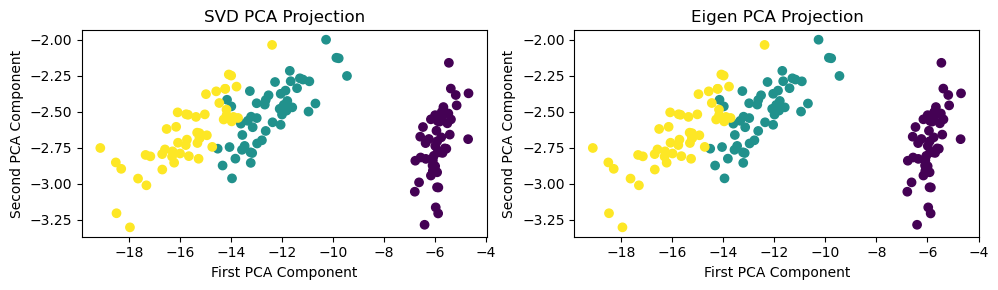

In [27]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title("SVD PCA Projection")
plt.scatter(x=svd_pca_projected[:,0], y=svd_pca_projected[:,1], c=df["target"])
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")
plt.subplot(1, 2, 2)
plt.title("Eigen PCA Projection")
plt.scatter(x=eigen_pca_projected[:,0], y=eigen_pca_projected[:,1], c=df["target"])
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")
plt.tight_layout()
plt.show();

# Shortcuts

Covariance

In [32]:
A = df[iris['feature_names']]
cov_mat = A.cov()

In [33]:
cov_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


PCA

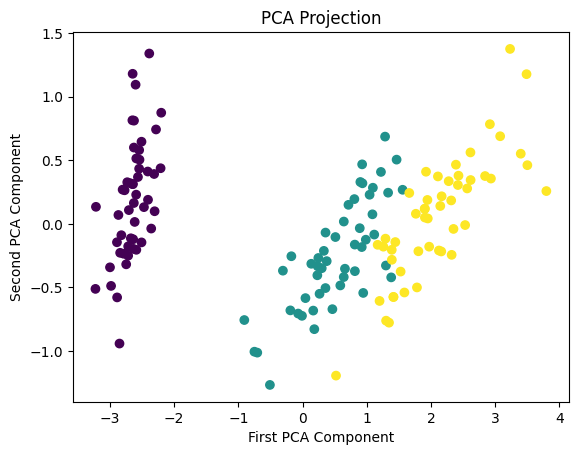

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_projected = pca.fit_transform(A)

plt.figure()
plt.title("PCA Projection")
plt.scatter(x=pca_projected[:,0], y=pca_projected[:,1], c=df["target"])
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")
plt.show();